In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from TicTacToe.human import Human as human
from TicTacToe.duel import duel, play_n_duels

# Value iteration

## Value iteration player vs random player

In [2]:
from TicTacToe.agent_value_iteration import create_avi
from TicTacToe.agent_random import Random as random_agent

In [3]:
agent1 = create_avi()
agent2 = random_agent()

In [4]:
playerX = agent2
playerO = agent1
playerO.set_role('O')

In [5]:
prob = play_n_duels(3000, playerX, playerO)

In [6]:
agent1.wins

2736

In [7]:
prob

array([0.76      , 0.875     , 0.87333333, 0.9025    , 0.922     ,
       0.93166667, 0.93571429, 0.9425    , 0.94111111, 0.939     ,
       0.92363636, 0.925     , 0.92769231, 0.93071429, 0.93266667,
       0.92875   , 0.92941176, 0.91388889, 0.91526316, 0.9195    ,
       0.92285714, 0.91363636, 0.9173913 , 0.91833333, 0.9216    ,
       0.92346154, 0.92      , 0.9175    , 0.91448276, 0.912     ])

Text(0, 0.5, 'Porcentaje de juegos ganados')

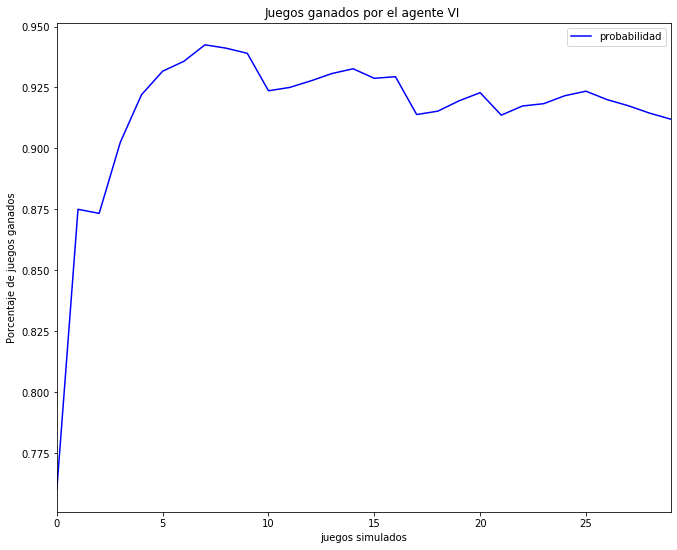

In [8]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente VI ',color='b')
plt.xlabel("juegos simulados")
plt.ylabel("Porcentaje de juegos ganados")

# Monte Carlo  

## Monte Carlo player vs random player

In [9]:
from TicTacToe.agent_mc import create_amc

In [10]:
agent4 = create_amc()

In [11]:
playerX = agent2
playerO = agent4
playerX.set_role('X')
playerO.set_role('O')

In [12]:
prob = play_n_duels(3000, playerX, playerO)

In [13]:
vals = [(k,v) for k, v in agent4.values.items() if v != 0]

In [14]:
len(vals)# +138

382

In [15]:
agent4.wins

2503

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

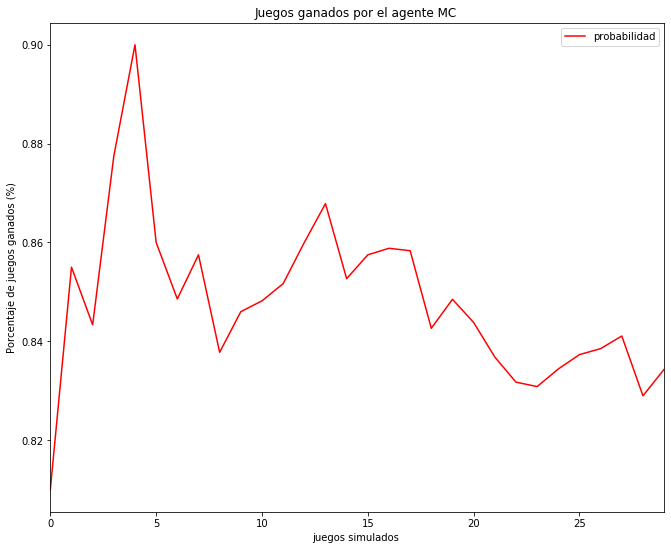

In [16]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

# Q-Learning

## Q-Learning player vs random player

In [17]:
from TicTacToe.agent_tabular_qlearning import create_atql

In [18]:
agent5 = create_atql()

In [19]:
playerX = agent2
playerO = agent5
playerX.set_role('X')
playerO.set_role('O')

In [20]:
prob = play_n_duels(18000, playerX, playerO)

In [21]:
vals = [(k,v) for k, v in agent5.values.items() if v != 0]

In [22]:
len(vals)

1116

In [23]:
agent5.wins

16239

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

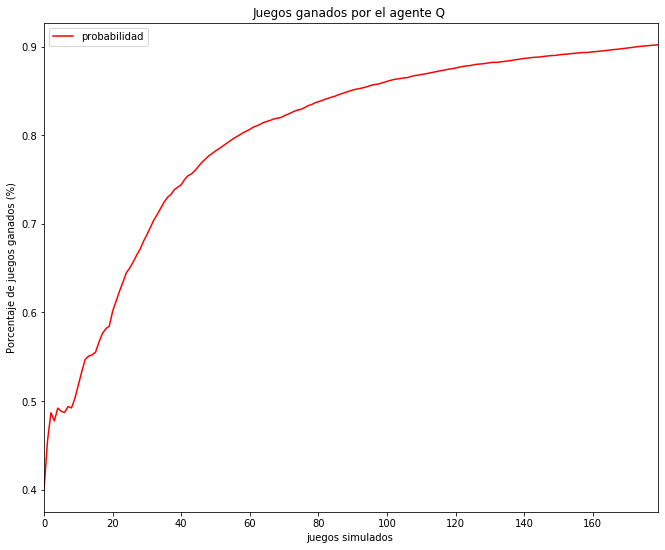

In [24]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente Q ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

# Q-Learning player vs human player

In [25]:
from TicTacToe.human import Human as human
human = human()

In [32]:
agent5.set_role('O')

In [33]:
duel(human, agent5, show=True)


              |  | 
            ----------
              |  | 
            ----------
              |  | 
        
Tu jugada es: 4

              |  | 
            ----------
              | X | 
            ----------
              |  | 
        

              |  | 
            ----------
              | X | 
            ----------
              |  | O
        
Tu jugada es: 2

              |  | X
            ----------
              | X | 
            ----------
              |  | O
        

              |  | X
            ----------
              | X | 
            ----------
              | O | O
        
Tu jugada es: 0

             X |  | X
            ----------
              | X | 
            ----------
              | O | O
        

             X |  | X
            ----------
              | X | 
            ----------
             O | O | O
        


2

# SARSA

## SARSA player vs random player

In [28]:
from TicTacToe.agent_sarsa import create_asarsa

In [29]:
agent6 = create_asarsa()

In [30]:
playerX = agent2
playerO = agent6
playerX.set_role('X')
playerO.set_role('O')

In [31]:
prob = play_n_duels(15000, playerX, playerO)

KeyboardInterrupt: 

In [ ]:
vals = [(k,v) for k, v in agent6.values.items() if v != 0]

In [ ]:
len(vals)

In [ ]:
agent6.wins

In [ ]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente SARSA ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

In [ ]:
playerX = agent5
playerO = agent6
playerX.set_role('X')
playerO.set_role('O')
prob = play_n_duels(15000, playerX, playerO)

In [ ]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente SARSA ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

In [ ]:
agent6.wins

In [ ]:
agent6.set_role('X')
duel(agent6, human, show=True)

# Campeonato

In [ ]:
def campeonato(array):
    jugadores = array
    pasan = []
    j = 0
    shuffle(jugadores) #Revuelve los jugadores
    for _ in range(3):
        ganador = duel(jugadores[j],jugadores[j+1],show = True)
        if ganador == 1:
            pasan.append(jugadores[j])
        else:
            pasan.append(jugadores[j+1])
        j+=2
        
    pasan.append(agent_7)
    j = 0
    jugadores = pasan
    pasan = []
    for _ in range(2):
        ganador = duel(jugadores[j],jugadores[j+1],show = True)
        if ganador == 1:
            pasan.append(jugadores[j])
        else:
            pasan.append(jugadores[j+1])
        j+=2
    ganador = duel(pasan[0],pasan[1])
    if ganador == 1:
        indice = Agentes.index(pasan[0])
    else:
        indice = Agentes.index(pasan[1])
    return indice


In [ ]:
def campeonatos(n,puntos):
    for _ in range(n):
        i = campeonato(Agentes)
        puntos[i] = puntos[i] + 1

    return puntos

print(campeonatos(100,puntuacion))